## Libreria Systematik di Open-CV con python3

### **Descrizoione**
Lo scopo di questa libreria è avere a disposizione la maggiorparte delle funzioni di opencv
in maniera facile da utilizzare per il team di sviluppo dell'azienda.

Questo file contiene tutte le funzioni che vengono  documentate e testate direttamente nel notebook di jupyter.

#### **Funzioni di OpenCV**

- cv.minERnclosingCircle()
- cv.minAreaRect()
- cv.boundingRect()
- cv2.fillPoly(img,pts,color)
- cv2.filter2D()
- cv2.Sobel()
- cv2.inRange(gray, 150, 255)
- cv2.createTrackbar('Canny Thresh:', source_window, thresh, max_thresh, thresh_callback)
- cv2.putText()

importa librerie necessarie

In [36]:
import sys
import numpy as np                         # calcolo numerico
import matplotlib.pyplot as plt            # visualizzazione grafica
import cv2                                 # open cv : manipolazione immagini

path dell'immagine da analizzare (su Windows). Modifica questo path se vuoi cambiare l'immagine presa in analisi.

In [207]:
path_immagine = '\\data\\img\\viz\\t2_1.png'

In [38]:

path_finale = sys.path[0].replace("\\tests","") + path_immagine

print("il path della tua immagine è: \n\n --->  ",path_finale)

il path della tua immagine è: 

 --->   c:\Users\Tech2\Documents\computer_vision_system\data\img\viz\t2_1.png


### carica immagine come oggetto opencv

In [39]:
img = cv2.imread(path_finale)

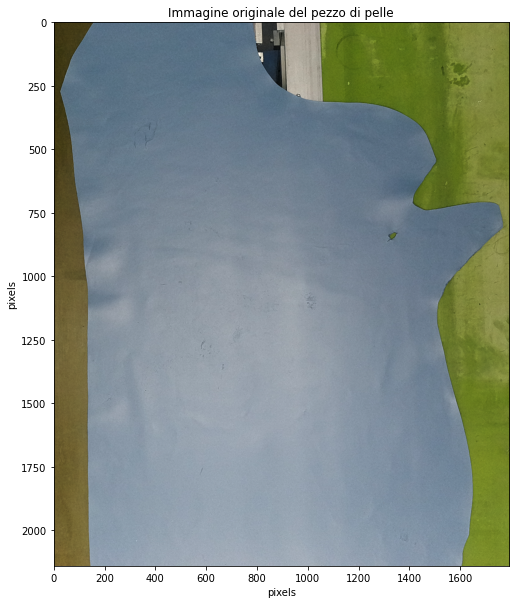

In [40]:
def visualizza_immagine(immagine, titolo='campione di pelle da processare'):
    '''
    visualizza immagine con la libreria matplotlib
    immagine è un oggetto prodotto da cv2.imread(path)
    '''
    plt.figure(figsize=(15,10))
    plt.title(titolo)
    plt.xlabel('pixels')
    plt.ylabel('pixels')
    plt.imshow(immagine)
    plt.show()

visualizza_immagine(immagine=img, titolo='Immagine originale del pezzo di pelle')

In [41]:
def load_image(path):
    '''
    carica le immagini
    le immagini possono risultare colorate diversamente
    poichè bisogna convertirle in altri formati (BRG,RBG,HSV)
    '''
    final_path = sys.path[0].replace("\\tests",'')+ path
    print('Immagine caricata dal seguente path \n\n --> ', final_path)
    return cv2.imread(final_path)

img = load_image(path_immagine)

Immagine caricata dal seguente path 

 -->  c:\Users\Tech2\Documents\computer_vision_system\data\img\viz\t2_1.png


In [42]:
def display_img_cv(img):
    '''
    visualizza immagine con opencv
    a differenza di matplotlib è più pesante
    ma supporta funzioni integrate come la trackbar di opencv
    '''
    cv2.imshow('la mia immagine',img)
    cv2.waitKey(0)

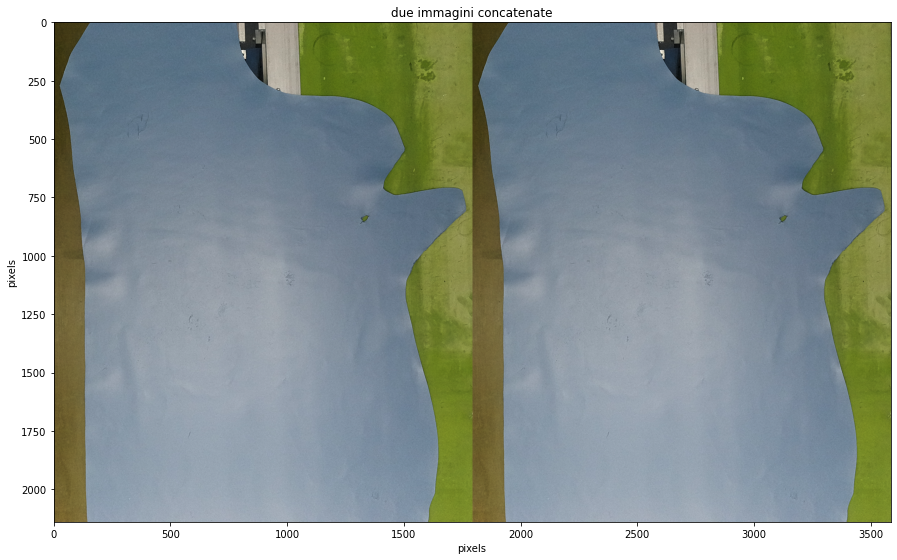

In [81]:
def concat_iamges(images_list2d):
    '''
    concatena immagini potendole visualizzare molteplici assieme attraverso
    l'oggetto che viene ritornato.
    inserire una lista di immagini come questi esempi:
        [img,img,img]           immagini 1x3
        ([img,img],[img,img])   immagini 2x2 
    '''
    return cv2.hconcat([cv2.vconcat(image) for image in images_list2d])


multiple_images = concat_iamges(([[img],[ img]]))
visualizza_immagine(multiple_images,'due immagini concatenate')

In [44]:
def calcola_istogramma(immagine, canale = 0 ):
    '''
    calcola il vettore istogramma di un immagine
    I valori vanno da 0-255 sulla asse delle x,
    l'intensità dei pixel, ovvero la frequenza dei pixel sull'asse delle y.
    Questa funzione NON distingue fra RGB, sei tu che devi dire il canale 
    che vuoi. 0=Rosso 1=Verde 2=Blu
    '''
    hist = cv2.calcHist([immagine], [canale], None, [256], [0, 256]) 
    return hist

istogramma = calcola_istogramma(immagine=img)

print(istogramma[:5])

[[104.]
 [ 24.]
 [ 19.]
 [ 27.]
 [ 11.]]


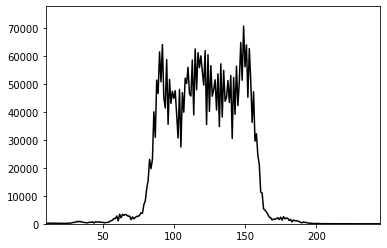

In [45]:
def plot_istogramma(hist, colore='black'):
    '''
    visualizza istogramma con matplotlib
    I valori vanno da 0-255 sulla asse delle x,
    l'intensità dei pixel, ovvero la frequenza dei pixel sull'asse delle y.
    '''
    plt.plot(hist, color = colore)
    plt.xlim([10, 245])
    plt.ylim([0,max(hist)*1.1])
    plt.show()
    
plot_istogramma(hist=istogramma)

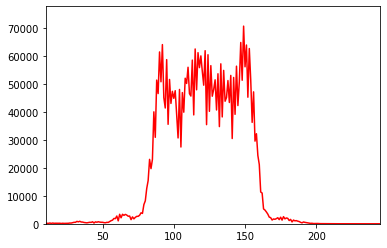

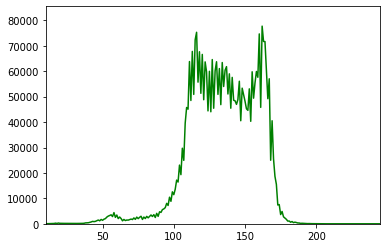

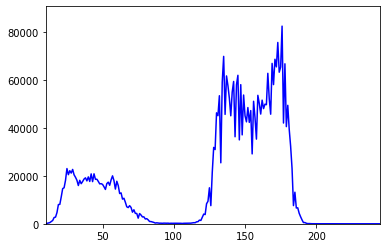

In [46]:
def rgb_histogram(img):
    '''
    calcola gli istogrammi RGB
    ritorna in output 3 vettori monodimensionali
    che descrivono l'istogramma dei pixel per i tre canali RGB
    Rosso Verde e Blu. I valori vanno da 0-255 sulla asse delle x,
    l'intensità dei pixel, ovvero la frequenza dei pixel sull'asse delle y.
    Il picco massimo è un valore assoluto e dipende dal numero di pixel nell'immagine,
    e quindi dalla risoluzione dell'immagine stessa.    
    '''
    # Compute histograms for each color channel for both images.
    hist1 = cv2.calcHist([img], [0], None, [256], [0, 255])
    hist2 = cv2.calcHist([img], [1], None, [256], [0, 255])
    hist3 = cv2.calcHist([img], [2], None, [256], [0, 255])
    return(hist1, hist2, hist3)


R,G,B = rgb_histogram(img=img)
plot_istogramma(R,'r')
plot_istogramma(G,'g')
plot_istogramma(B,'b')


In [47]:
def statistiche_immagine(img):
   '''
   crea statistiche per l'immagine
   -  massimo intensità
   -  minimo intensità
   -  totale valori pixels
   -  numero totale di pixels
   -  Intensità colore medio = totale / totale di pixel
   '''
   h = np.zeros((300,256,3))
   k = np.zeros(256)
   b,g,r = cv2.split(img)
   bins = np.arange(256).reshape(256,1)
   color = [ (255,0,0),(0,255,0),(0,0,255) ]

   for item,col in zip([b,g,r],color):

      pixel_totali = 0
      totale = 0

      hist_item = calcola_istogramma(item)
      dim = np.size(hist_item)
      massimo = np.ndarray.max(hist_item)
      minimo = np.ndarray.min(hist_item)

      for i in range(dim):
         k[i] = hist_item[i]
         totale = totale + hist_item[i]*i
         pixel_totali = pixel_totali + hist_item[i]

   print(' massimo intensità  \t\t\t\t\t', massimo)  
   print(' minimo intensità   \t\t\t\t\t', minimo)
   print(' totale valori pixels\t\t\t\t\t', totale[0] )
   
   numero_totale_pixel = pixel_totali[0]
   print(' numero totale di pixels\t\t\t\t',numero_totale_pixel)

   instensita_colore_medio = round(float(totale)/float(pixel_totali),5)
   print(' Intensità colore medio = totale / totale di pixel\t',instensita_colore_medio)

   return( massimo,minimo,pixel_totali[0],instensita_colore_medio ) 


massimo, minimo, tot_pixels, colore_medio = statistiche_immagine(img=img)


 massimo intensità  					 82436.0
 minimo intensità   					 0.0
 totale valori pixels					 497385700.0
 numero totale di pixels				 3837020.0
 Intensità colore medio = totale / totale di pixel	 129.62812


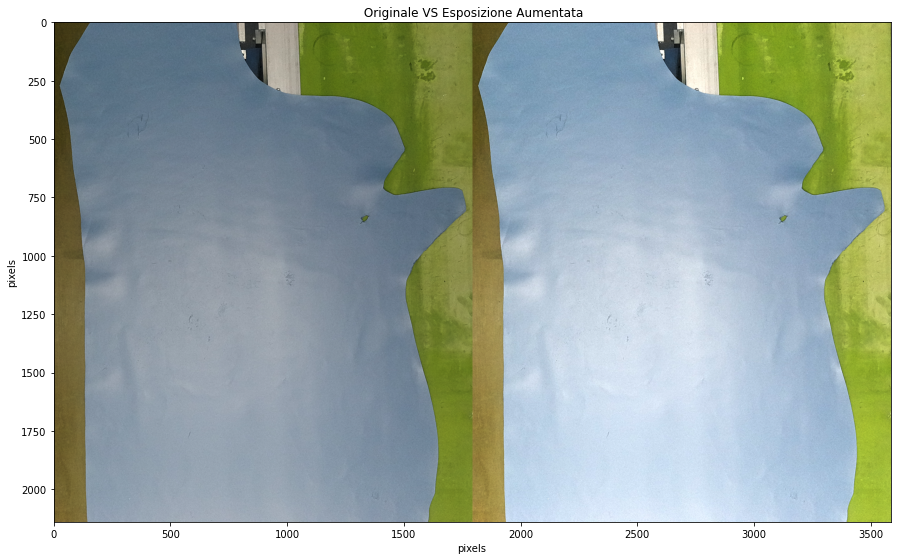

In [83]:
def normalizza(img, min_thresh=0, max_thresh=1200):
    '''
    Questa funzione serve per normalizzare 
    e quindi per ristringere il campo del valore dei pixel.
    Il valore base appartiene fra 0 e 255.
    '''
    norm = np.zeros((2000,2000))
    immagine_finale = cv2.normalize(img,  norm, 0, max_thresh, cv2.NORM_MINMAX)
    return immagine_finale

immagine_normalizzata = normalizza(img, 200, 350)

multiple_images = concat_iamges(([[img],[ immagine_normalizzata]]))
visualizza_immagine(multiple_images,' Originale VS Esposizione Aumentata')


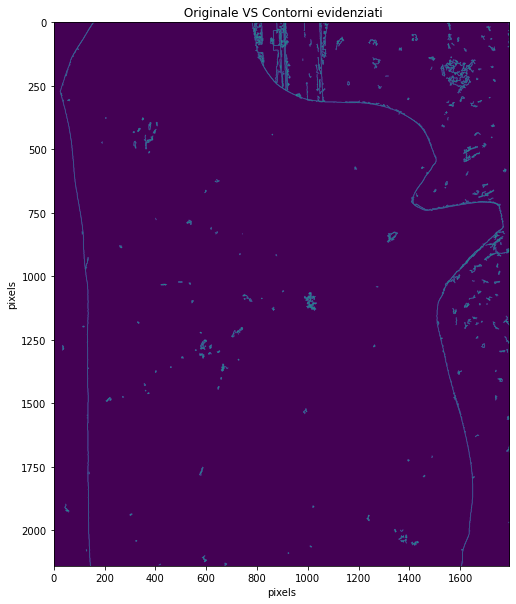

In [109]:
def disegna_canny(img,mix_thresh,max_thresh):
    '''
    Utilizza la funzione Canny di opencv per disegnare i bordi dell'immagine di input.
    Metti i treshold minimo e massimo per generare immagini diverse
    '''
    immagine_con_bordi = cv2.Canny(img, mix_thresh, max_thresh)
    return immagine_con_bordi

min_canny = 40
max_canny = 150

contorni = disegna_canny(img, min_canny, max_canny)

visualizza_immagine(contorni,' Originale VS Contorni evidenziati')


In [50]:
def save_image(nome_immagine, estensione='jpg'):
    '''
    Salva l'immagine inserendo il nome dell'immagine.
    Inserisci l'estensione del file che può essere di tipo jpg o png
    '''
    h = np.zeros((300,256,3)) # 256 intensità di colore
    cv2.imwrite(nome_immagine + '.' + estensione, h )

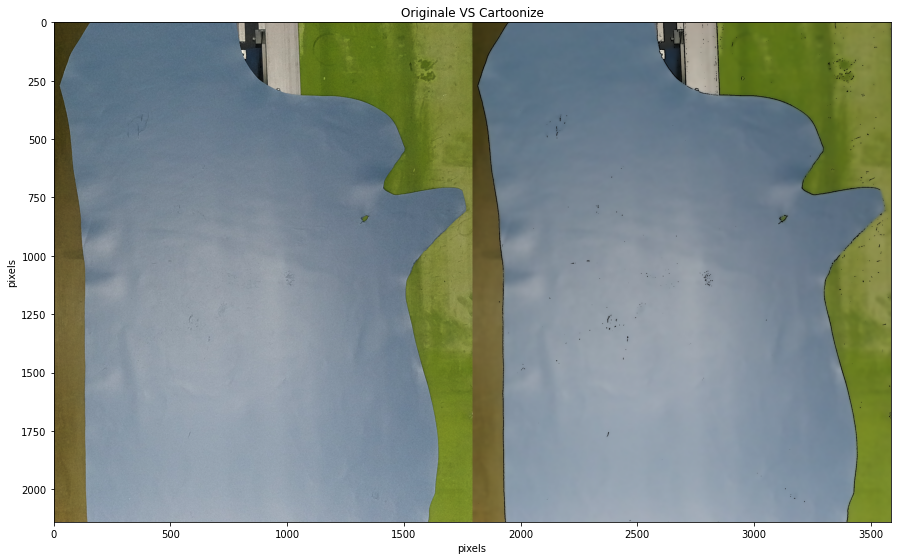

In [111]:
def cartoonize(img,a=20,b=200,c=250):
    '''
    Modifica l'immagine rendendola come un cartone.
    permette di eliminare il rumore di fondo e fare smoothing, 
    così da visualizzare meglio l'oggetto e separarlo dallo sfondo. 
    '''
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(5,5),-1)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,9,10)
    color = cv2.bilateralFilter(img, a, b, c)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon

immagine_cartone = cartoonize(img=img, a=20,b=150,c=255)
multiple_images = concat_iamges(([[img],[immagine_cartone]]))
visualizza_immagine(multiple_images,'Originale VS Cartoonize')

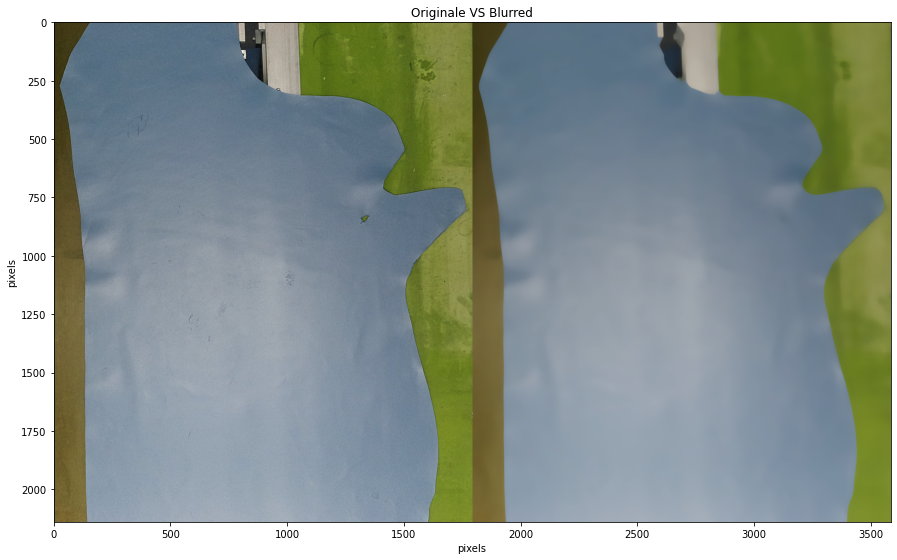

In [114]:
def median_blurr(img, kernel_size=9):
    '''
    permette di fare Blur (sfocatura) dell'immagine con l'algoritmo medianBlur di opencv
    il kernel_size può essere = 3, 9, 15
    '''
    blurred = cv2.medianBlur(img, kernel_size)
    return blurred


def gaussian_blur(img, kernel_size=9):
    '''
    permette di fare Blur (sfocatura) dell'immagine con l'algoritmo gaussianBlur di opencv
    il kernel_size può essere = 3, 9, 15
    '''    
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), cv2.BORDER_DEFAULT)
    return blurred


GRANDEZZA_KERNEL = 45

blurred_img = median_blurr( img = img , kernel_size = GRANDEZZA_KERNEL)

multiple_images = concat_iamges(([[img],[blurred_img]]))
visualizza_immagine(multiple_images,'Originale VS Blurred')

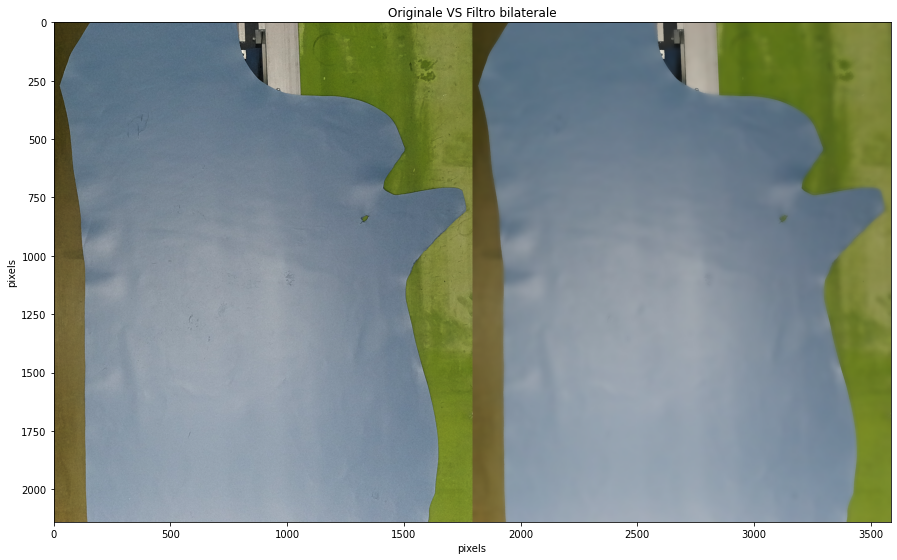

In [119]:
def bilateral_filter(img, d_ = 30, sigma_color = 65, sigma_space = 15):
    '''
    Applica filtro bilateralFilter di opencv.
    Un filtro bilaterale è un filtro levigante non lineare, che preserva i bordi e riduce il rumore per le immagini. 
    Sostituisce l'intensità di ciascun pixel con una media ponderata dei valori di intensità dei pixel vicini.
    '''
    bilateral_image = cv2.bilateralFilter(img, d = d_, sigmaColor = sigma_color, sigmaSpace = sigma_space)
    return bilateral_image

A = 30
B = 120
C = 90

bilatered_image = bilateral_filter(img, A, B, C)


multiple_images = concat_iamges(([[img],[bilatered_image]]))
visualizza_immagine(multiple_images,'Originale VS Filtro bilaterale')

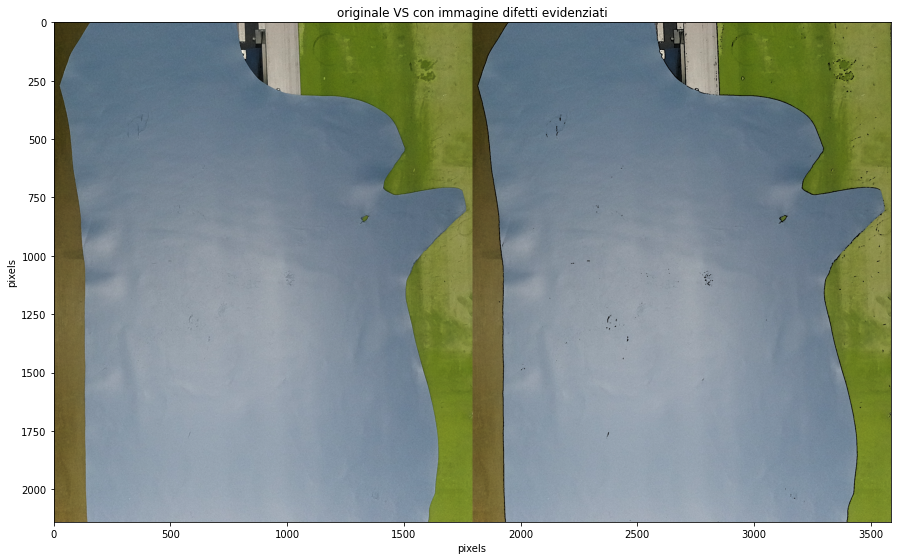

In [137]:
def adaptative_threshold(img, threshold, kernel_size_1, kernel_size_2 ):
    '''
    Se un'immagine ha condizioni di illuminazione diverse in aree diverse. In tal caso, la soglia adattiva può aiutare. 
    Qui, l'algoritmo determina la soglia per un pixel in base a una piccola regione attorno ad esso. 
    Quindi otteniamo soglie diverse per diverse regioni della stessa immagine che danno risultati migliori per immagini con illuminazione variabile.

    Quarto argomento puè essere
    - cv.ADAPTIVE_THRESH_MEAN_C : Il valore di soglia è la media dell'area vicina meno la costante C.
    - cv.ADAPTIVE_THRESH_GAUSSIAN_C : il valore di soglia è una somma ponderata gaussiana dei valori del vicinato meno la costante C.
    '''
    gray_1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_2 = cv2.medianBlur(gray_1, kernel_size_1)
    edges = cv2.adaptiveThreshold(gray_2, threshold, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, kernel_size_2, kernel_size_2)
    finale = cv2.bitwise_and(img, img, mask = edges).copy()
    return finale

THRESHOLD = 200
KERNEL_SIZE_1 = 5
KERNEL_SIZE_2 = 9

immagine_difetti_evidenziati = adaptative_threshold(img, THRESHOLD, KERNEL_SIZE_1, KERNEL_SIZE_2)


multiple_images = concat_iamges(([[img],[immagine_difetti_evidenziati]]))
visualizza_immagine(multiple_images,'originale VS immagine con difetti evidenziati')

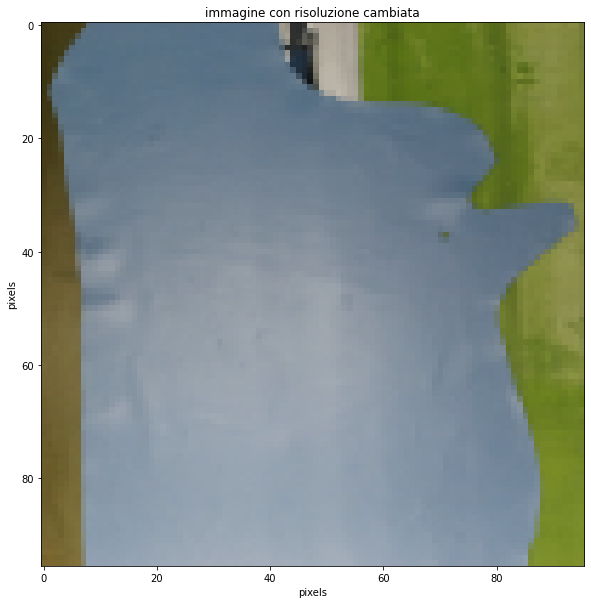

In [142]:
def change_resolution(low_res_image, resolution_level = 10):
    '''
    cambia la risoluzione aumentando o diminuendo la dimensione dell'immagine
    con un algoritmo di interpolazione
    '''
    resolution = resolution_level * 32
    image = cv2.resize(low_res_image, (resolution,resolution), interpolation=cv2.INTER_AREA)
    return image


immagine_risoluzione_cambiata = change_resolution(img, resolution_level = 3)

visualizza_immagine(immagine_risoluzione_cambiata,'immagine con risoluzione cambiata')
# non è possibile visualizzarla accanto all'originale in quanto le dimensioni dell'immagine sono diverse

Prendi l'immagine con i contorni evidenziati, ed attraverso gli algoritmi di opencv aumenta notevolmente la risoluzione per evidenziare ancora di più i difetti.

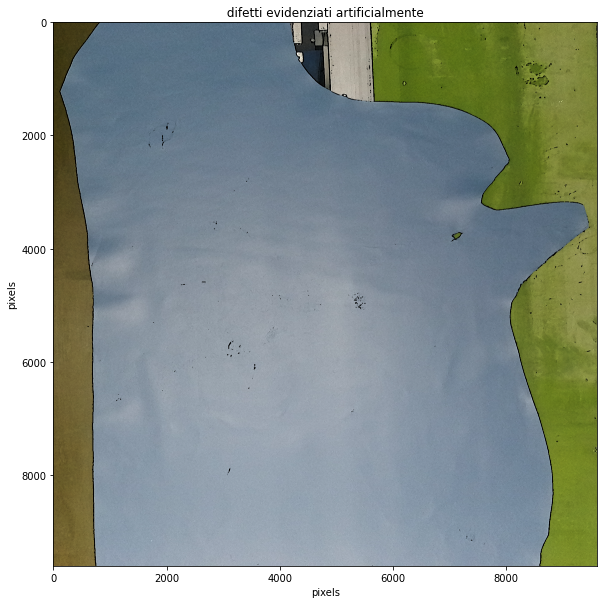

In [143]:
immagine_risoluzione_cambiata = change_resolution(immagine_difetti_evidenziati, resolution_level = 300)

visualizza_immagine(immagine_risoluzione_cambiata,' difetti evidenziati artificialmente ')

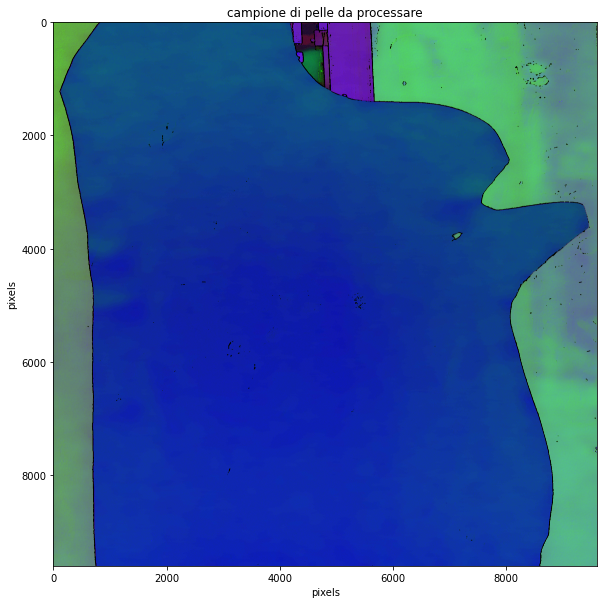

In [144]:
def BGR_to_HSV(nome_immagine):
    '''
    converti l'immagine da formato opencv BGR (opposto di RGB) a grayscale (scala di grigi)
    '''
    return cv2.cvtColor(nome_immagine ,cv2.COLOR_BGR2HSV)

immagine_hsv = BGR_to_HSV(immagine_risoluzione_cambiata)
visualizza_immagine(immagine_hsv)

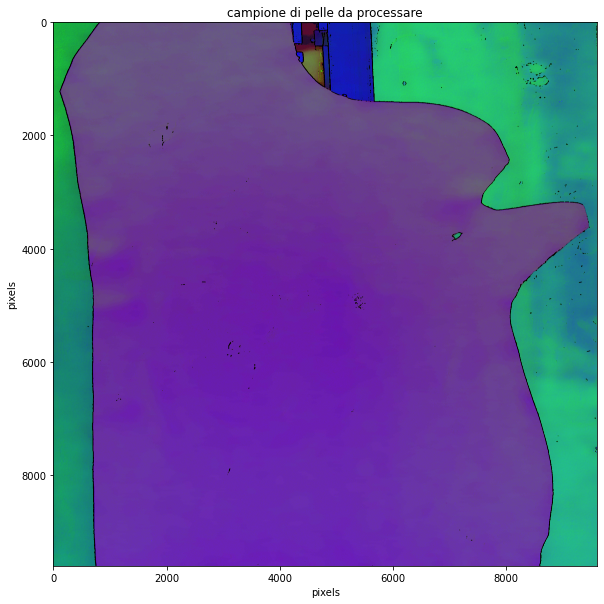

In [145]:
def RGB_to_HSV(nome_immagine):
    '''
    converti l'immagine da formato opencv BGR (opposto di RGB) a grayscale (scala di grigi)
    '''
    return cv2.cvtColor(nome_immagine ,cv2.COLOR_RGB2HSV)


immagine_hsv = RGB_to_HSV(immagine_risoluzione_cambiata)
visualizza_immagine(immagine_hsv)

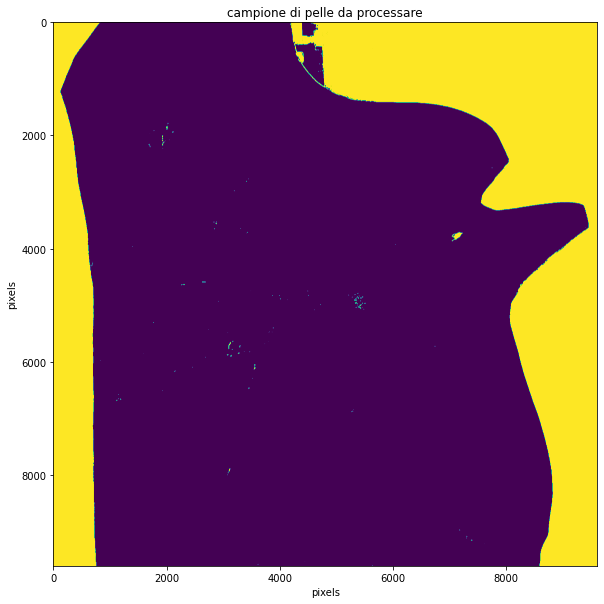

In [160]:
img_hsv = cv2.cvtColor(immagine_hsv, cv2.COLOR_BGR2HSV)

hsv_color1 = np.asarray([0, 0, 0])   
hsv_color2 = np.asarray([50, 255, 255])  

mask = cv2.inRange(immagine_hsv, hsv_color1, hsv_color2)
visualizza_immagine(mask)

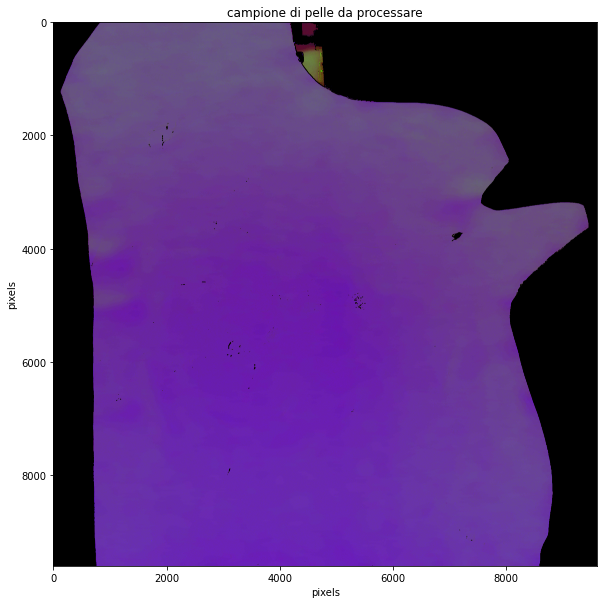

In [162]:
def inverti_maschera(img,mask):
    mask2 = cv2.bitwise_not(mask)
    return cv2.bitwise_or(img, img, mask = mask2).copy()

img_senza_background = inverti_maschera(immagine_hsv, mask)
visualizza_immagine(img_senza_background)

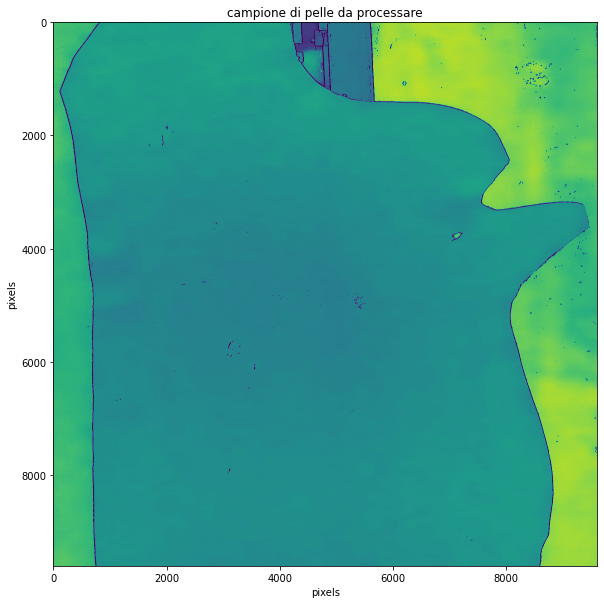

In [163]:
def BGR_to_GRAY(nome_immagine):
    return cv2.cvtColor(nome_immagine ,cv2.COLOR_BGR2GRAY)

immagine_gray = BGR_to_GRAY(immagine_hsv)
visualizza_immagine(immagine_gray)

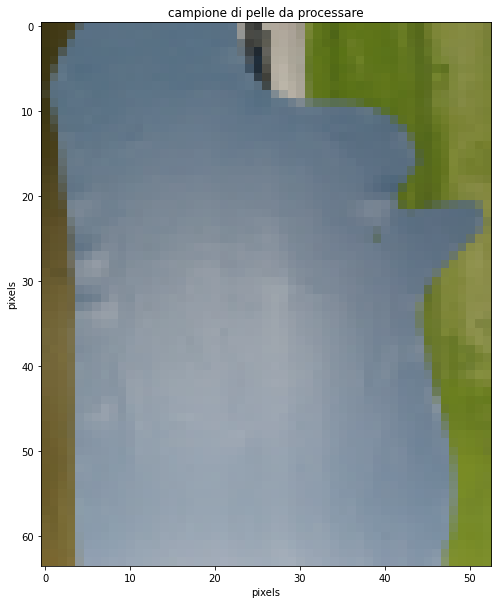

In [169]:
def resize(img, scale_percent=50):
    '''
    ottenere una risoluzione maggiore se scale_percent > 100
    ottenere una risoluzione inferiore se scale_percent < 100
    scale_percent da 1 a 500 %
    l'immagine rimane la stessa se scale_percent = 100
    '''
    width = int(img.shape[1] * scale_percent / 100)
    height =  int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized.copy()

RESOLUTION = 3 # 1 - 1000

resized_image = resize(img, 3)
visualizza_immagine(resized_image)

# PUOI VISUALIZZARLO ANCHE COSI
# cv2.imshow("Resized image", resized_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [170]:
def set_threshold(nome_immagine, x, y):
    '''
    Se il valore del pixel è inferiore alla soglia, viene impostato su 0, altrimenti viene impostato su un valore massimo.
    olding as described above is done by using the type cv.THRESH_BINARY. All simple thresholding types are:

        cv.THRESH_BINARY
        cv.THRESH_BINARY_INV
        cv.THRESH_TRUNC
        cv.THRESH_TOZERO
        cv.THRESH_TOZERO_INV
    '''
    res , alpha_mark = cv2.threshold(nome_immagine, x,y, cv2.THRESH_BINARY_INV)
    return res, alpha_mark

threshol_image = set_threshold(img,50,140)
print(threshol_image[:2])

(50.0, array([[[  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 140],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0,   0]],

       [[  0,   0, 140],
        [  0,   0, 140],
        [  0, 140, 140],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0,   0]],

       [[  0,   0, 140],
        [  0,   0, 140],
        [  0, 140, 140],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0,   0]],

       ...,

       [[  0,   0, 140],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 140]],

       [[  0,   0, 140],
        [  0,   0,   0],
        [  0,   0, 140],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 140]],

       [[  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 140],
        ...,
        [  0,   0, 140],
        [  0,   0, 140],
        [  0,   0

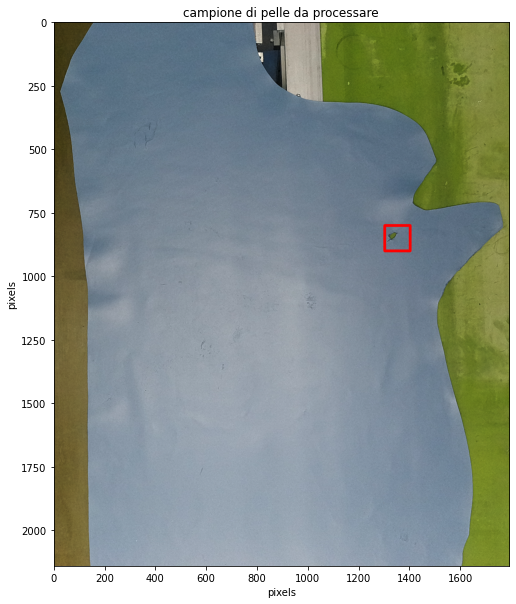

In [171]:
def draw_rectangle(image, start_point = (1800, 800),end_point = (1900, 900),color = (255, 0, 0), thickness = 5 ):
    '''
    disegna un rettangolo nell'immagine specificandogli due angoli opposti del rettangolo,
    il colore con un valore RGB, esempio (255,0,0) per il rosso 
    thickness come intero per lo spessore delle linee
    '''
    image2 = image.copy()
    return cv2.rectangle(image2, start_point, end_point, color, thickness)


image_with_rectangle = draw_rectangle(img,start_point = (1300, 800),end_point = (1400, 900),color = (255, 0, 0), thickness = 10)
visualizza_immagine(image_with_rectangle)

### Rimuovi lo sfondo
##### **Workflow**
- Leggi l'input
- Soglia su bianco
- Applicare la morfologia vicino per rimuovere la striscia centrale
- Ottieni i contorni
- Disegna i contorni come riempiti di bianco su sfondo nero
- Ottieni lo scafo convesso dei contorni riempiti di bianco
- Montare un'ellisse sullo scafo convesso
- Stampa la forma dell'ellisse per assicurarti che sia vicino a un cerchio
- Disegna il contorno convesso dello scafo in rosso sull'input per verificare se si adatta alla regione bianca
- Disegna un cerchio usando i raggi medi dell'ellisse e centra come bianco riempito su sfondo nero
- Erodere leggermente il cerchio per evitare di lasciare un anello bianco parziale
- Combina l'immagine morph invertita e l'immagine del cerchio per creare una maschera finale
- Applicare la maschera finale all'input
- Salva i risultati

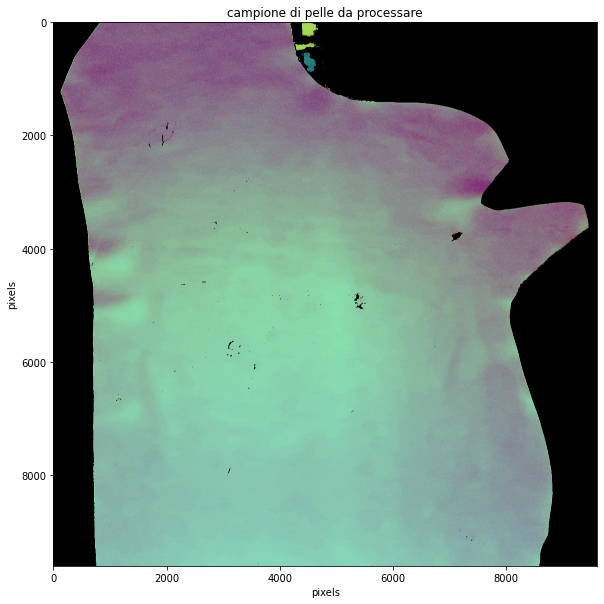

In [175]:
def remove_background(img, lower = [50, 25, 20],upper=[220, 175, 55], kernel_diameter=(60,60)):
    # Read image
    immagine_preprocessata = cv2.cvtColor( img, cv2.COLOR_RGB2HSV)
    hh, ww = immagine_preprocessata.shape[:2]
    # threshold on white, define lower and uppper limits
    lower = np.array(lower)
    upper = np.array(upper)
    # Create mask to only select black
    thresh = cv2.inRange(img, lower, upper)
    # apply morphology
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_diameter)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    mask = 255 - morph
    finale = cv2.bitwise_and(immagine_preprocessata, immagine_preprocessata, mask=mask)
    return finale 


result = remove_background(img_senza_background)
visualizza_immagine(result)


# Seleziona una zona sull'immagine

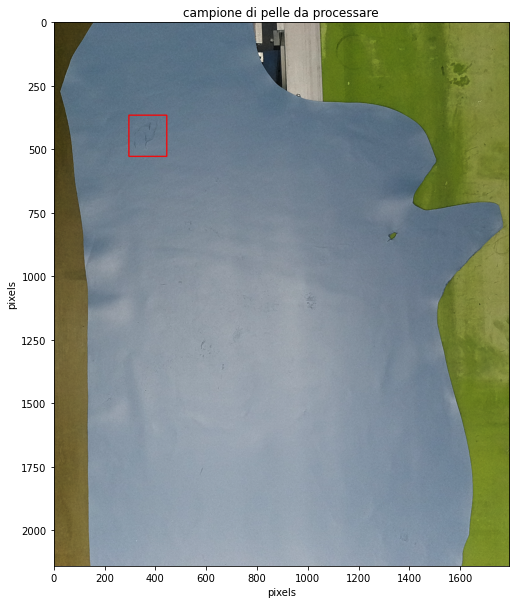

In [65]:
def seleziona_zona(image):
    '''
    seleziona una parte dell'immagine con un rettangolo
    per evidenziarla e salvarla.
    '''
    mask = np.zeros(image.shape[:2], np.uint8)
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)
    x, y , w, h = cv2.selectROI("select the area", image)
    start = (x, y)
    end = (x + w, y + h)
    rect = (x, y , w, h)
    copy = image.copy()
    cv2.rectangle(copy, start, end, (255,0,0), 3)
    visualizza_immagine(copy)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

seleziona_zona(image=img)

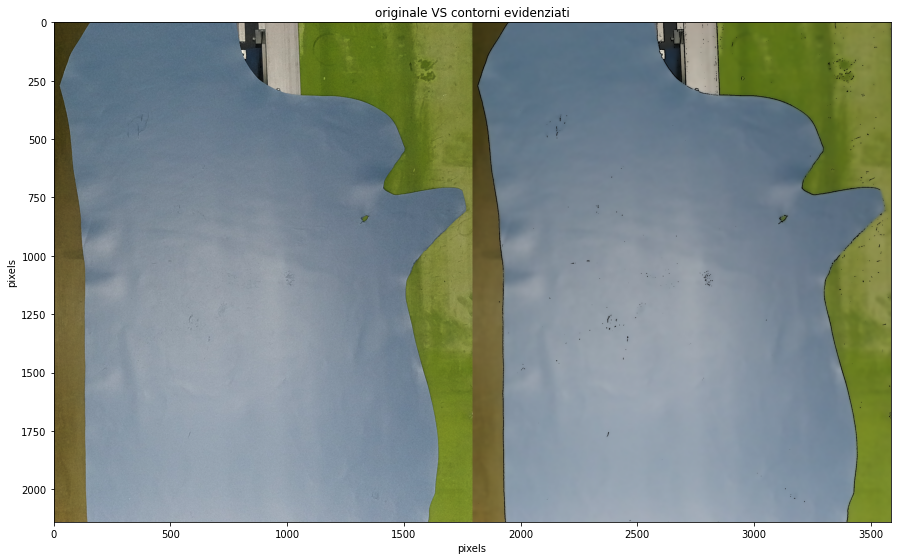

In [179]:
def trova_imperfezioni(img, min_canny=40, max_canny=200, min_canny2=150, max_canny2=220):
    '''
    processa immagine al fine di visualizzare piu imperfezioni possibili
    all'interno della pelle.
    parametri default:  min_canny=40, max_canny=200, min_canny2=150, max_canny2=220
    '''
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, min_canny, max_canny)
    edges_high_thresh = cv2.Canny(edges, min_canny2, max_canny2)
    return edges_high_thresh


immagine_con_imperfezioni = trova_imperfezioni(immagine_cartone, min_canny = 40, max_canny = 150, min_canny2 = 150, max_canny2 = 250 )
multiple_images = concat_iamges(([[img ],[ immagine_cartone]]))
visualizza_immagine(multiple_images,'originale VS contorni evidenziati')

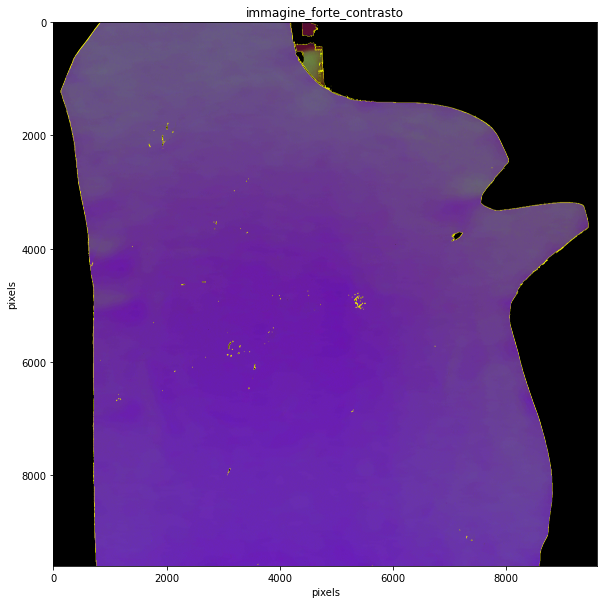

In [181]:
def disegna_difetti(img):
    '''
    disegna linee in maniera automatica sull'immagine
    '''
    out = img.copy()
    gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 90, 120)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 10, minLineLength=5, maxLineGap=20)
    for line in lines: # Draw lines on the image
        x1, y1, x2, y2 = line[0]
        cv2.line(out, (x1, y1), (x2, y2), (255,255,0), 3)
    return out

immagine_forte_contrasto = disegna_difetti( img = img_senza_background  )
visualizza_immagine(immagine_forte_contrasto,'immagine_forte_contrasto')

In [206]:
def disegna_contorni(image):
    '''
    trova imperfezioni in un immagine evidenziandole con un colore.
    '''
    immagine_con_imperfezioni = trova_imperfezioni(image, min_canny = 40, max_canny = 150, min_canny2 = 150, max_canny2 = 250 )
    image = cv2.cvtColor(immagine_con_imperfezioni, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    contour, hier = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    mask = cv2.drawContours(image, contour, -1, (50,255,0),2)
    print("numero di contorni trovati \n\n --->  " + str(len(contour)))

    return mask

maschera = disegna_contorni(image=immagine_forte_contrasto)

print(maschera.size)
print(img.size)

finale = cv2.bitwise_and(img, img, mask = maschera)

visualizza_immagine(finale ,'difetti evidenziati')

#visualizza_immagine(immagine_forte_contrasto,'difetti evidenziati')

numero di contorni trovati 

 --->  7473
11511060
11511060


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


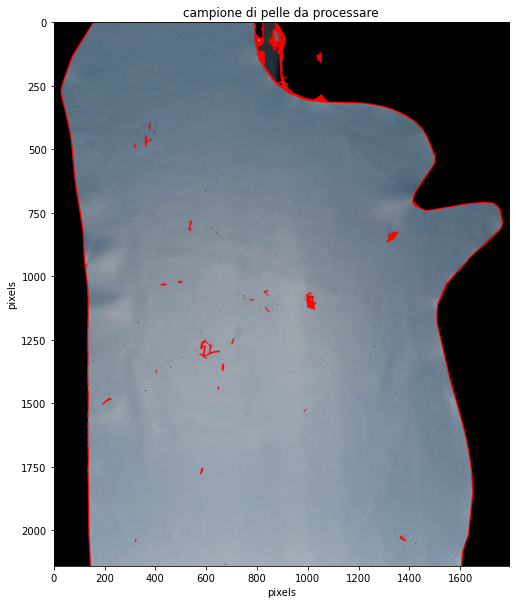

In [70]:
def computer_vision_system(immagine):
    immagine_cartone = cartoonize(img = immagine, a=10,b=170,c=255)
    # generate border masks
    img_hsv = cv2.cvtColor(immagine_hsv, cv2.COLOR_BGR2HSV)
    hsv_color1 = np.asarray([0, 0, 0])
    hsv_color2 = np.asarray([60, 255, 255])
    mask = cv2.inRange(img_hsv, hsv_color1, hsv_color2)

    img_senza_background = inverti_maschera(immagine_cartone, mask)
    immagine_forte_contrasto = disegna_difetti( img = img_senza_background)
    return immagine_forte_contrasto

final_img = computer_vision_system(img)
visualizza_immagine(final_img)